<a href="https://colab.research.google.com/github/SankarSivan/Guvi_DSC_Case-study/blob/main/Phonepe_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/PhonePe/pulse.git

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (2702/2702), done.
remote: Compressing objects: 100% (2153/2153), done.
remote: Total 17904 (delta 842), reused 2301 (delta 507), pack-reused 15202 (from 1)
Receiving objects: 100% (17904/17904), 26.21 MiB | 17.86 MiB/s, done.
Resolving deltas: 100% (8584/8584), done.
Updating files: 100% (9029/9029), done.


In [2]:
import pandas as pd
import json
import os

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st

# Data Extraction

### **1.1 Aggregated Transaction**



In [5]:
import os
path = "/content/pulse/data/aggregated/transaction/country/india/state"
Aggr_state_list = os.listdir(path)
print(Aggr_state_list)


['puducherry', 'bihar', 'odisha', 'lakshadweep', 'gujarat', 'andaman-&-nicobar-islands', 'himachal-pradesh', 'chhattisgarh', 'jammu-&-kashmir', 'ladakh', 'sikkim', 'dadra-&-nagar-haveli-&-daman-&-diu', 'nagaland', 'tripura', 'mizoram', 'madhya-pradesh', 'jharkhand', 'arunachal-pradesh', 'west-bengal', 'uttarakhand', 'rajasthan', 'manipur', 'telangana', 'andhra-pradesh', 'goa', 'chandigarh', 'kerala', 'karnataka', 'delhi', 'assam', 'punjab', 'haryana', 'maharashtra', 'meghalaya', 'uttar-pradesh', 'tamil-nadu']


In [122]:
# Extract the Aggr_data

clm = {'state':[], 'year':[], 'quater':[], 'transaction_type':[], 'transaction_count':[], 'transaction_amount':[]}

# pull data
for i in Aggr_state_list:
  p_i = path + '/' + i + '/'
  Aggr_yr = os.listdir(p_i)

  #print(Aggr_yr)
  for j in Aggr_yr:
    p_j = p_i + j + '/'
    Aggr_qutr = os.listdir(p_j)
    #print(Aggr_qutr)

    for k in Aggr_qutr:
      p_k = p_j + k
      Data = open(p_k, 'r')
      D = json.load(Data)

      for z in D['data']['transactionData']:
        Name = z['name']
        Count = z['paymentInstruments'][0]['count']
        Amount = z['paymentInstruments'][0]['amount']
        clm['transaction_type'].append(Name)
        clm['transaction_count'].append(Count)
        clm['transaction_amount'].append(Amount)
        clm ['state'].append(i)
        clm ['year'].append(j)
        clm ['quater'].append(int(k.strip('.json')))

aggr_trans = pd.DataFrame(clm)
print(aggr_trans)


           state  year  quater          transaction_type  transaction_count  \
0     puducherry  2020       3     Peer-to-peer payments             855511   
1     puducherry  2020       3         Merchant payments             560420   
2     puducherry  2020       3  Recharge & bill payments             306852   
3     puducherry  2020       3        Financial Services               3039   
4     puducherry  2020       3                    Others               5080   
...          ...   ...     ...                       ...                ...   
5029  tamil-nadu  2018       4     Peer-to-peer payments           11538547   
5030  tamil-nadu  2018       4  Recharge & bill payments            7093764   
5031  tamil-nadu  2018       4         Merchant payments            3145621   
5032  tamil-nadu  2018       4        Financial Services             228398   
5033  tamil-nadu  2018       4                    Others             451114   

      transaction_amount  
0           3.116584e+09

In [123]:
aggr_trans.nunique()

,0
state,36
year,7
quater,4
transaction_type,5
transaction_count,4966
transaction_amount,5034


### **1.2 Aggregated User**

aggr_usr_path = "/content/pulse/data/aggregated/user/country/india/state"

Aggr_user_state_list = os.listdir(aggr_usr_path)
print(Aggr_user_state_list)

In [66]:
# Extract the Aggr_User

clm = {'state':[], 'year':[], 'quater':[], 'User_Brand':[], 'User_count':[], 'User_percentage':[]}

# Define the path to the aggregated user data
agg_usr_path = "/content/pulse/data/aggregated/user/country/india/state"
#print(os.listdir(agg_usr_path))

# List all states (folders) in the given path
Aggr_user_state_list = os.listdir(agg_usr_path)

# pull data
for i in Aggr_user_state_list:
  p_i = os.path.join(agg_usr_path, i)
  Aggr_yr = os.listdir(p_i)
  #print(Aggr_yr)

  for j in Aggr_yr:
    p_j = os.path.join(p_i, j)
    Aggr_qutr = os.listdir(p_j)
    #print(Aggr_qutr)

    #The for loop for to be indented to be in the j loop
    for k in Aggr_qutr:
      p_k = os.path.join(p_j, k)
      #print('p_k')

    # Open and load JSON data
    with open(p_k, 'r') as Data:
      D = json.load(Data)

    # Check if 'usersByDevice' key exists and is not None
    if D['data'] and 'usersByDevice' in D['data'] and D['data']['usersByDevice']:
        for z in D['data']['usersByDevice']:
            clm['User_Brand'].append(z['brand'])
            clm['User_count'].append(z['count'])
            clm['User_percentage'].append(z['percentage'])
            clm['state'].append(i)
            clm['year'].append(j)
            clm['quater'].append(int(k.strip('.json')))

# Convert dictionary to DataFrame
aggr_user = pd.DataFrame(clm)
print(aggr_user)


           state  year  quater User_Brand  User_count  User_percentage
0     puducherry  2020       4     Xiaomi       71555         0.223871
1     puducherry  2020       4    Samsung       63620         0.199045
2     puducherry  2020       4       Vivo       61208         0.191499
3     puducherry  2020       4       Oppo       33860         0.105936
4     puducherry  2020       4     Realme       14505         0.045381
...          ...   ...     ...        ...         ...              ...
1579  tamil-nadu  2018       4     Lenovo      194451         0.037395
1580  tamil-nadu  2018       4      Apple      191032         0.036738
1581  tamil-nadu  2018       4    OnePlus      180637         0.034739
1582  tamil-nadu  2018       4     Huawei      164880         0.031708
1583  tamil-nadu  2018       4     Others      558850         0.107474

[1584 rows x 6 columns]


### 1.3 Aggregated insurance

In [67]:
# Extract the Aggregated_Insurance

clm = {'state':[], 'year':[], 'quater':[], 'name':[], 'count':[], 'amount':[]}

# Define the path to the aggregated insurance data
aggr_insurance_path = "/content/pulse/data/aggregated/insurance/country/india/state"
#print(os.listdir(aggr_insurance_path))


# List all states (folders) in the given path
Aggr_insurance_state_list = os.listdir(aggr_insurance_path)
#print(Aggr_insurance_state_list)


# pull data
for i in Aggr_insurance_state_list:
  p_i = os.path.join(aggr_insurance_path, i)
  Aggr_yr = os.listdir(p_i)
  #print(Aggr_yr)


  for j in Aggr_yr:
    p_j = os.path.join(p_i, j)
    Aggr_qutr = os.listdir(p_j)
    #print(Aggr_qutr)

    #The for loop for to be indented to be in the j loop
    for k in Aggr_qutr:
      p_k = os.path.join(p_j, k)
      #print(p_k)


    # Open and load JSON data
    with open(p_k, 'r') as Data:
      D = json.load(Data)

    # Loading data to clm
    if D['data'] and 'transactionData' in D['data'] and D['data']['transactionData']:
        for z in D['data']['transactionData']:
            clm['name'].append(z['name'])
            clm['count'].append(z['paymentInstruments'][0]['count'])
            clm['amount'].append(z['paymentInstruments'][0]['amount'])
            clm['state'].append(i)
            clm['year'].append(j)
            clm['quater'].append(int(k.strip('.json')))

# Convert dictionary to DataFrame
aggr_insurance = pd.DataFrame(clm)
print(aggr_insurance)


          state  year  quater       name   count       amount
0    puducherry  2020       4  Insurance     234     197955.0
1    puducherry  2024       4  Insurance    2838    3896033.0
2    puducherry  2021       4  Insurance     786     946607.0
3    puducherry  2023       4  Insurance    2447    3419395.0
4    puducherry  2022       4  Insurance    2331    2693130.0
..          ...   ...     ...        ...     ...          ...
174  tamil-nadu  2020       4  Insurance   10290    8993575.0
175  tamil-nadu  2024       4  Insurance  127002  173784251.0
176  tamil-nadu  2021       4  Insurance   33037   42184290.0
177  tamil-nadu  2023       4  Insurance  104871  139433796.0
178  tamil-nadu  2022       4  Insurance  125491  146457790.0

[179 rows x 6 columns]


### **2.1 Map insurance**

In [68]:
# Extract the Map_Insurance

clm = {'state':[], 'year':[], 'quater':[], 'name':[], 'count':[], 'amount':[]}

# Define the path to the map insurance data
map_insurance_path = "/content/pulse/data/map/insurance/country/india/state"
#print(os.listdir(map_insurance_path))


# List all states (folders) in the given path
map_insurance_state_list = os.listdir(map_insurance_path)
#print(map_insurance_state_list)

# pull data
for i in Aggr_insurance_state_list:
  p_i = os.path.join(aggr_insurance_path, i)
  Aggr_yr = os.listdir(p_i)
  #print(Aggr_yr)

  for j in Aggr_yr:
    p_j = os.path.join(p_i, j)
    Aggr_qutr = os.listdir(p_j)
    #print(Aggr_qutr)

    #The for loop for to be indented to be in the j loop
    for k in Aggr_qutr:
      p_k = os.path.join(p_j, k)
     #print(p_k)


    # Open and load JSON data
    with open(p_k, 'r') as Data:
      D = json.load(Data)

    # l;oading data to clm
    if D['data'] and 'transactionData' in D['data'] and D['data']['transactionData']:
        for z in D['data']['transactionData']:
            clm['name'].append(z['name'])
            clm['count'].append(z['paymentInstruments'][0]['count'])
            clm['amount'].append(z['paymentInstruments'][0]['amount'])
            clm['state'].append(i)
            clm['year'].append(j)
            clm['quater'].append(int(k.strip('.json')))

# Convert dictionary to DataFrame
map_insurance = pd.DataFrame(clm)
print(map_insurance)


          state  year  quater       name   count       amount
0    puducherry  2020       4  Insurance     234     197955.0
1    puducherry  2024       4  Insurance    2838    3896033.0
2    puducherry  2021       4  Insurance     786     946607.0
3    puducherry  2023       4  Insurance    2447    3419395.0
4    puducherry  2022       4  Insurance    2331    2693130.0
..          ...   ...     ...        ...     ...          ...
174  tamil-nadu  2020       4  Insurance   10290    8993575.0
175  tamil-nadu  2024       4  Insurance  127002  173784251.0
176  tamil-nadu  2021       4  Insurance   33037   42184290.0
177  tamil-nadu  2023       4  Insurance  104871  139433796.0
178  tamil-nadu  2022       4  Insurance  125491  146457790.0

[179 rows x 6 columns]


## 2.2 Map user

In [69]:
# Define the dictionary to store extracted data
clm_user = {'state': [], 'year': [], 'quarter': [], 'district': [], 'registered_users': [], 'app_opens': []}

# Set the file path
map_user_path = "/content/pulse/data/map/user/hover/country/india/state"
state_list = os.listdir(map_user_path)

for state in state_list:
    state_path = os.path.join(map_user_path, state)
    if not os.path.isdir(state_path):  # Skip if not a directory
        continue

    year_list = os.listdir(state_path)

    for year in year_list:
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):  # Skip if not a directory
            continue

        quarter_list = os.listdir(year_path)

        for quarter in quarter_list:
            quarter_path = os.path.join(year_path, quarter)
            if not quarter_path.endswith('.json'):  # Ensure it's a JSON file
                continue

            with open(quarter_path, 'r') as data_file:
                data = json.load(data_file)

            if data.get("data") and "hoverData" in data["data"]:
                for district, values in data["data"]["hoverData"].items():
                    clm_user['state'].append(state)
                    clm_user['year'].append(year)
                    clm_user['quarter'].append(int(quarter.strip('.json')))
                    clm_user['district'].append(district)
                    clm_user['registered_users'].append(values.get('registeredUsers', 0))
                    clm_user['app_opens'].append(values.get('appOpens', 0))

# Convert to DataFrame
map_user = pd.DataFrame(clm_user)
print(map_user)

            state  year  quarter             district  registered_users  \
0      puducherry  2020        3    karaikal district             26910   
1      puducherry  2020        3  puducherry district            239707   
2      puducherry  2020        3       yanam district             11054   
3      puducherry  2020        3        mahe district              7502   
4      puducherry  2020        2    karaikal district             23612   
...           ...   ...      ...                  ...               ...   
20603  tamil-nadu  2018        4       theni district             49911   
20604  tamil-nadu  2018        4     ranipet district             75577   
20605  tamil-nadu  2018        4    namakkal district             94773   
20606  tamil-nadu  2018        4     vellore district            103405   
20607  tamil-nadu  2018        4  thiruvarur district             31566   

       app_opens  
0         303955  
1        3437500  
2         396823  
3          83881  
4   

## 2.3 map_transaction

In [70]:
clm_transaction = {'state': [], 'year': [], 'quater': [], 'transaction_count': [], 'transaction_amount': []}

map_transaction_path = "/content/pulse/data/map/transaction/hover/country/india"
year_list = os.listdir(map_transaction_path)

for year in year_list:
    year_path = os.path.join(map_transaction_path, year)

    if not os.path.isdir(year_path):  # Skip if it's not a directory
        continue

    quarter_list = os.listdir(year_path)

    for quarter in quarter_list:
        quarter_path = os.path.join(year_path, quarter)

        if not quarter_path.endswith('.json'):  # Skip non-JSON files
            continue

        with open(quarter_path, 'r') as Data:
            D = json.load(Data)

        if 'data' in D and 'hoverDataList' in D['data']:
            for entry in D['data']['hoverDataList']:
                clm_transaction['state'].append(entry['name'])
                clm_transaction['year'].append(year)
                clm_transaction['quater'].append(int(quarter.strip('.json')))
                clm_transaction['transaction_count'].append(entry['metric'][0]['count'])
                clm_transaction['transaction_amount'].append(entry['metric'][0]['amount'])

map_transaction = pd.DataFrame(clm_transaction)
print(map_transaction)

                  state  year  quater  transaction_count  transaction_amount
0            puducherry  2020       3            1730902        3.598080e+09
1            tamil nadu  2020       3           70277825        1.438414e+11
2         uttar pradesh  2020       3          127405259        2.486900e+11
3        madhya pradesh  2020       3          108579881        2.057017e+11
4        andhra pradesh  2020       3          204902935        4.670841e+11
...                 ...   ...     ...                ...                 ...
1003    jammu & kashmir  2018       4            2721310        5.664720e+09
1004                goa  2018       4             514755        1.153005e+09
1005  arunachal pradesh  2018       4             176429        5.040400e+08
1006              delhi  2018       4           29187719        3.972286e+10
1007        uttarakhand  2018       4            3178761        5.654272e+09

[1008 rows x 5 columns]


## 3.1 top_insurance

In [71]:
# Define data structure
clm_insurance = {'state':[], 'year':[], 'quater':[], 'district/pincode':[], 'top_insurance_count':[], 'top_insurance_amount':[]}

# Define the path to the top insurance data
top_insurance_path = "/content/pulse/data/top/insurance/country/india/state"
Top_insurance_state_list = os.listdir(top_insurance_path)

# Extract data
for i in Top_insurance_state_list:
    p_i = os.path.join(top_insurance_path, i)
    Top_yr = os.listdir(p_i)

    for j in Top_yr:
        p_j = os.path.join(p_i, j)
        Top_qutr = os.listdir(p_j)

        for k in Top_qutr:
            p_k = os.path.join(p_j, k)

            with open(p_k, 'r') as Data:
                D = json.load(Data)

            if D['data']:
                # Extract district data
                if 'districts' in D['data'] and D['data']['districts']:
                    for dist in D['data']['districts']:
                        clm_insurance['state'].append(i)
                        clm_insurance['year'].append(j)
                        clm_insurance['quater'].append(int(k.strip('.json')))
                        clm_insurance['district/pincode'].append(dist['entityName'])
                        clm_insurance['top_insurance_count'].append(dist['metric']['count'])
                        clm_insurance['top_insurance_amount'].append(dist['metric']['amount'])

                # Extract pincode data
                if 'pincodes' in D['data'] and D['data']['pincodes']:
                    for pin in D['data']['pincodes']:
                        clm_insurance['state'].append(i)
                        clm_insurance['year'].append(j)
                        clm_insurance['quater'].append(int(k.strip('.json')))
                        clm_insurance['district/pincode'].append(pin['entityName'])
                        clm_insurance['top_insurance_count'].append(pin['metric']['count'])
                        clm_insurance['top_insurance_amount'].append(pin['metric']['amount'])

# Convert dictionary to DataFrame
top_insurance = pd.DataFrame(clm_insurance)
print(top_insurance)

            state  year  quater district/pincode  top_insurance_count  \
0      puducherry  2020       3       puducherry                  143   
1      puducherry  2020       3            yanam                   25   
2      puducherry  2020       3         karaikal                   14   
3      puducherry  2020       3             mahe                    9   
4      puducherry  2020       3           605004                   26   
...           ...   ...     ...              ...                  ...   
12271  tamil-nadu  2022       4           600106                  909   
12272  tamil-nadu  2022       4           600083                  886   
12273  tamil-nadu  2022       4           600056                  869   
12274  tamil-nadu  2022       4           600053                  812   
12275  tamil-nadu  2022       4           600119                  808   

       top_insurance_amount  
0                   40754.0  
1                    6919.0  
2                    5445.0  
3  

## 3.2 top transactions

In [72]:
# Define data structure
clm = {'state':[], 'year':[], 'quater':[], 'district/pincode':[], 'top_transaction_count':[], 'top_transaction_amount':[]}

# Define the path to the top transactions data
top_txn_path = "/content/pulse/data/top/transaction/country/india/state"
Top_txn_state_list = os.listdir(top_txn_path)

# Extract data
for i in Top_txn_state_list:
    p_i = os.path.join(top_txn_path, i)
    Top_yr = os.listdir(p_i)

    for j in Top_yr:
        p_j = os.path.join(p_i, j)
        Top_qutr = os.listdir(p_j)

        for k in Top_qutr:
            p_k = os.path.join(p_j, k)

            with open(p_k, 'r') as Data:
                D = json.load(Data)

            if D['data']:
                # Extract district data
                if 'districts' in D['data'] and D['data']['districts']:
                    for dist in D['data']['districts']:
                        clm['state'].append(i)
                        clm['year'].append(j)
                        clm['quater'].append(int(k.strip('.json')))
                        clm['district/pincode'].append(dist['entityName'])
                        clm['top_transaction_count'].append(dist['metric']['count'])
                        clm['top_transaction_amount'].append(dist['metric']['amount'])

                # Extract pincode data
                if 'pincodes' in D['data'] and D['data']['pincodes']:
                    for pin in D['data']['pincodes']:
                        clm['state'].append(i)
                        clm['year'].append(j)
                        clm['quater'].append(int(k.strip('.json')))
                        clm['district/pincode'].append(pin['entityName'])
                        clm['top_transaction_count'].append(pin['metric']['count'])
                        clm['top_transaction_amount'].append(pin['metric']['amount'])

# Convert dictionary to DataFrame
top_transaction = pd.DataFrame(clm)
print(top_transaction)

            state  year  quater district/pincode  top_transaction_count  \
0      puducherry  2020       3       puducherry                1515874   
1      puducherry  2020       3            yanam                 105613   
2      puducherry  2020       3         karaikal                  85556   
3      puducherry  2020       3             mahe                  23859   
4      puducherry  2020       3           605002                 563408   
...           ...   ...     ...              ...                    ...   
18290  tamil-nadu  2018       4           635126                 203970   
18291  tamil-nadu  2018       4           641601                 183276   
18292  tamil-nadu  2018       4           602105                 165149   
18293  tamil-nadu  2018       4           600100                 155543   
18294  tamil-nadu  2018       4           620001                 155412   

       top_transaction_amount  
0                3.144232e+09  
1                2.123505e+08  
2  

## 3.3 Top_user

In [73]:
# Define dictionary structure
clm_user = {'state': [], 'year': [], 'quater': [], 'district/pincode': [], 'top_user_count': []}

# Define the path
top_user_path = "/content/pulse/data/top/user/country/india/state"
Top_user_state_list = os.listdir(top_user_path)

for i in Top_user_state_list:
    p_i = os.path.join(top_user_path, i)
    Top_yr = os.listdir(p_i)

    for j in Top_yr:
        p_j = os.path.join(p_i, j)
        Top_qutr = os.listdir(p_j)

        for k in Top_qutr:
            p_k = os.path.join(p_j, k)

            with open(p_k, 'r') as Data:
                D = json.load(Data)

            if D['data']:
                # Extract district data
                if 'districts' in D['data'] and D['data']['districts']:
                    for dist in D['data']['districts']:
                        clm_user['state'].append(i)
                        clm_user['year'].append(j)
                        clm_user['quater'].append(int(k.strip('.json')))
                        clm_user['district/pincode'].append(dist['name'])
                        clm_user['top_user_count'].append(dist['registeredUsers'])

                # Extract pincode data
                if 'pincodes' in D['data'] and D['data']['pincodes']:
                    for pin in D['data']['pincodes']:
                        clm_user['state'].append(i)
                        clm_user['year'].append(j)
                        clm_user['quater'].append(int(k.strip('.json')))
                        clm_user['district/pincode'].append(pin['name'])
                        clm_user['top_user_count'].append(pin['registeredUsers'])

# Convert dictionary to DataFrame
top_user = pd.DataFrame(clm_user)
print(top_user)

            state  year  quater district/pincode  top_user_count
0      puducherry  2020       3       puducherry          239707
1      puducherry  2020       3         karaikal           26910
2      puducherry  2020       3            yanam           11054
3      puducherry  2020       3             mahe            7502
4      puducherry  2020       3           605110           32402
...           ...   ...     ...              ...             ...
18291  tamil-nadu  2018       4           600056           34394
18292  tamil-nadu  2018       4           635126           33327
18293  tamil-nadu  2018       4           600119           32763
18294  tamil-nadu  2018       4           600053           32652
18295  tamil-nadu  2018       4           600003           31780

[18296 rows x 5 columns]


## Trying get out

In [74]:
print(top_user)
print(top_transaction)
print(top_insurance)
print(map_transaction)
print(map_user)
print(map_insurance)
print(aggr_user)
print(aggr_trans)
print(aggr_insurance)

            state  year  quater district/pincode  top_user_count
0      puducherry  2020       3       puducherry          239707
1      puducherry  2020       3         karaikal           26910
2      puducherry  2020       3            yanam           11054
3      puducherry  2020       3             mahe            7502
4      puducherry  2020       3           605110           32402
...           ...   ...     ...              ...             ...
18291  tamil-nadu  2018       4           600056           34394
18292  tamil-nadu  2018       4           635126           33327
18293  tamil-nadu  2018       4           600119           32763
18294  tamil-nadu  2018       4           600053           32652
18295  tamil-nadu  2018       4           600003           31780

[18296 rows x 5 columns]
            state  year  quater district/pincode  top_transaction_count  \
0      puducherry  2020       3       puducherry                1515874   
1      puducherry  2020       3            y

In [75]:
print(top_user.shape)
print(top_transaction.shape)
print(top_insurance.shape)
print(map_transaction.shape)
print(map_user.shape)
print(map_insurance.shape)
print(aggr_user.shape)
print(aggr_trans.shape)
print(aggr_insurance.shape)

(18296, 5)
(18295, 6)
(12276, 6)
(1008, 5)
(20608, 6)
(179, 6)
(1584, 6)
(5034, 6)
(179, 6)


In [76]:

top_user.to_csv('top_user.csv', index=False)
top_transaction.to_csv('top_transaction.csv', index=False)
top_insurance.to_csv('top_insurance.csv', index=False)
map_transaction.to_csv('map_transaction.csv', index=False)
map_user.to_csv('map_user.csv', index=False)
map_insurance.to_csv('map_insurance.csv', index=False)
aggr_user.to_csv('aggr_user.csv', index=False)
aggr_trans.to_csv('aggr_trans.csv', index=False)
aggr_insurance.to_csv('aggr_insurance.csv', index=False)


# Data Preprocessing

In [77]:
tables = ([top_user, top_transaction, top_insurance, map_transaction, map_user, map_insurance, aggr_user, aggr_trans, aggr_insurance])

for table in tables:
  print(table.columns)

Index(['state', 'year', 'quater', 'district/pincode', 'top_user_count'], dtype='object')
Index(['state', 'year', 'quater', 'district/pincode', 'top_transaction_count',
       'top_transaction_amount'],
      dtype='object')
Index(['state', 'year', 'quater', 'district/pincode', 'top_insurance_count',
       'top_insurance_amount'],
      dtype='object')
Index(['state', 'year', 'quater', 'transaction_count', 'transaction_amount'], dtype='object')
Index(['state', 'year', 'quarter', 'district', 'registered_users',
       'app_opens'],
      dtype='object')
Index(['state', 'year', 'quater', 'name', 'count', 'amount'], dtype='object')
Index(['state', 'year', 'quater', 'User_Brand', 'User_count',
       'User_percentage'],
      dtype='object')
Index(['state', 'year', 'quater', 'transaction_type', 'transaction_count',
       'transaction_amount'],
      dtype='object')
Index(['state', 'year', 'quater', 'name', 'count', 'amount'], dtype='object')


for table in tables:
 print(top_user.info())

In [78]:
for table in tables:
  print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18296 entries, 0 to 18295
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             18296 non-null  object
 1   year              18296 non-null  object
 2   quater            18296 non-null  int64 
 3   district/pincode  18296 non-null  object
 4   top_user_count    18296 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 714.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18295 entries, 0 to 18294
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   18295 non-null  object 
 1   year                    18295 non-null  object 
 2   quater                  18295 non-null  int64  
 3   district/pincode        18293 non-null  object 
 4   top_transaction_count   18295 non-null  int64  
 5   top_transaction_amount  18295

In [79]:
top_user.columns

Index(['state', 'year', 'quater', 'district/pincode', 'top_user_count'], dtype='object')

# EDA
    Business Concernes
    1. Transaction Trends & Dynamics
    2. Device Usage & User Engagement
    3. Insurance Penetration & Market Growth
    4. Geographical Analysis (State/District level transactions)
    5. User Registration & Growth Analysis

## 1. Transaction Trends & Dynamics

In [124]:
print(aggr_trans.head(5))

        state  year  quater          transaction_type  transaction_count  \
0  puducherry  2020       3     Peer-to-peer payments             855511   
1  puducherry  2020       3         Merchant payments             560420   
2  puducherry  2020       3  Recharge & bill payments             306852   
3  puducherry  2020       3        Financial Services               3039   
4  puducherry  2020       3                    Others               5080   

   transaction_amount  
0        3.116584e+09  
1        3.355834e+08  
2        1.389254e+08  
3        4.788490e+06  
4        2.199408e+06  


In [125]:
print(aggr_trans.nunique())

state                   36
year                     7
quater                   4
transaction_type         5
transaction_count     4966
transaction_amount    5034
dtype: int64


In [82]:
print(aggr_trans.columns)


Index(['state', 'year', 'quater', 'transaction_type', 'transaction_count',
       'transaction_amount'],
      dtype='object')


In [128]:
# 1. Transaction Trends & Dynamics

# Grouping transaction quarter based
aggr_trans_grouped = aggr_trans.groupby('quater')['transaction_count'].sum().reset_index()
print(aggr_trans_grouped)

   quater  transaction_count
0       1        47844793678
1       2        54659969115
2       3        62141176425
3       4        70638277656


In [84]:
print(aggr_trans['year'].unique())

['2020' '2024' '2021' '2023' '2022' '2019' '2018']


In [85]:
print(aggr_trans['quater'].unique())

[3 2 1 4]


In [86]:
aggr_trans['quater'] = pd.to_datetime(aggr_trans['quater']).dt.quarter
aggr_trans['year'] = pd.to_datetime(aggr_trans['year']).dt.year

In [133]:
aggr_trans['year_quater'] = aggr_trans['year'].astype(str) + " Q" + aggr_trans['quater'].astype(str)
print(aggr_trans['year_quater'].unique())

['2018 Q1' '2018 Q2' '2018 Q3' '2018 Q4' '2019 Q1' '2019 Q2' '2019 Q3'
 '2019 Q4' '2020 Q1' '2020 Q2' '2020 Q3' '2020 Q4' '2021 Q1' '2021 Q2'
 '2021 Q3' '2021 Q4' '2022 Q1' '2022 Q2' '2022 Q3' '2022 Q4' '2023 Q1'
 '2023 Q2' '2023 Q3' '2023 Q4' '2024 Q1' '2024 Q2' '2024 Q3' '2024 Q4']


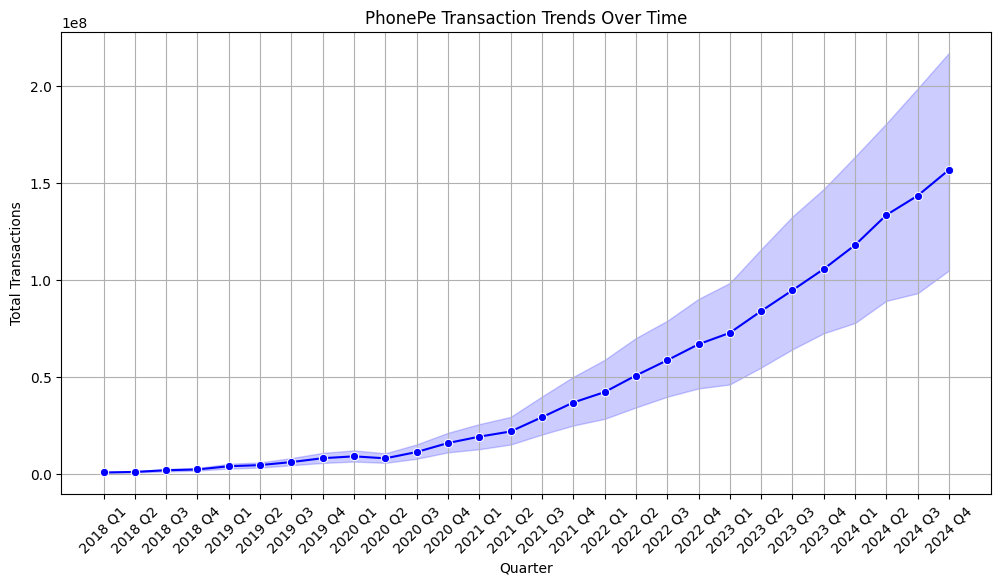

In [134]:
# Sort for continuity
aggr_trans = aggr_trans.sort_values(by=['year', 'quater'])

# Plot the trend
plt.figure(figsize=(12,6))
sns.lineplot(data=aggr_trans, x='year_quater', y='transaction_count', marker='o', color='b')

# Improve readability
plt.title("PhonePe Transaction Trends Over Time")
plt.xlabel("Quarter")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

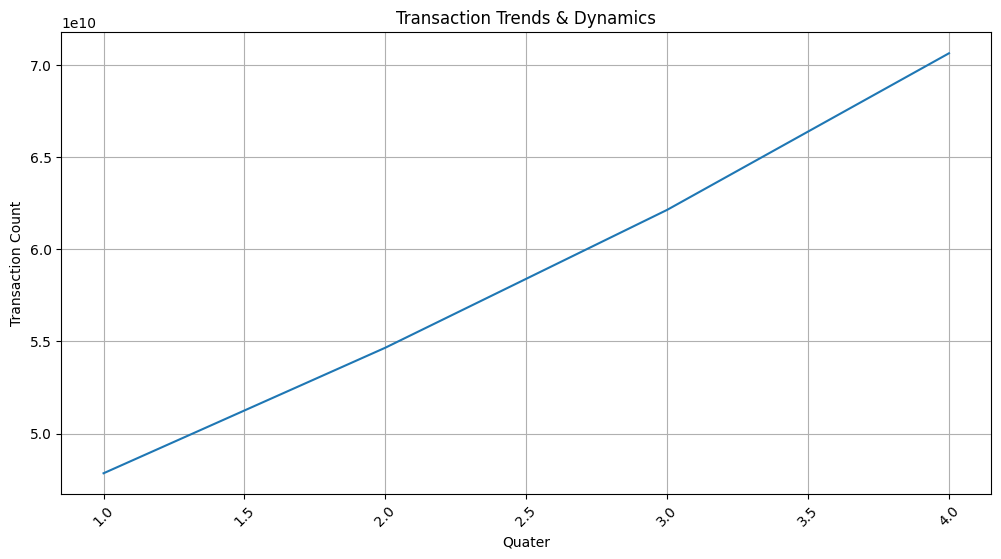

In [89]:
# plot trend

plt.figure(figsize= (12,6))
sns.lineplot(data=aggr_trans_grouped, x= 'quater', y= 'transaction_count')
plt.title('Transaction Trends & Dynamics')
plt.xlabel('Quater')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 2. Device Usage & User Engagement

In [90]:
aggr_user.nunique()

,0
state,36
year,4
quater,1
User_Brand,18
User_count,1576
User_percentage,1584


In [91]:
aggr_user.rename(columns=lambda x: x.strip(), inplace=True)

In [92]:
print(aggr_user.columns)

Index(['state', 'year', 'quater', 'User_Brand', 'User_count',
       'User_percentage'],
      dtype='object')


In [93]:
aggr_user.head(5)

,state,year,quater,User_Brand,User_count,User_percentage
0,puducherry,2020,4,Xiaomi,71555,0.223871
1,puducherry,2020,4,Samsung,63620,0.199045
2,puducherry,2020,4,Vivo,61208,0.191499
3,puducherry,2020,4,Oppo,33860,0.105936
4,puducherry,2020,4,Realme,14505,0.045381


In [94]:
col = aggr_user.columns
print(col)

Index(['state', 'year', 'quater', 'User_Brand', 'User_count',
       'User_percentage'],
      dtype='object')


In [95]:
corrected_column_name = [col for col in aggr_user.columns if "user" in col.lower() and "brand" in col.lower()]
print("Corrected column name:", corrected_column_name)

Corrected column name: ['User_Brand']


In [96]:
device_usage = aggr_user.groupby(corrected_column_name[0])[['User_count', 'User_percentage']].sum().reset_index()
print (device_usage)

    User_Brand  User_count  User_percentage
0        Apple    24531502         4.204404
1         Asus     1052599         0.387832
2       Gionee      717411         0.450689
3   HMD Global      191869         0.089827
4       Huawei    14731750         2.549781
5      Infinix     1595413         0.117918
6         Lava      401511         0.097134
7       Lenovo    10279373         1.725200
8     Micromax     2801001         0.742374
9     Motorola    18648464         2.802456
10     OnePlus    16264161         2.460689
11        Oppo   109689555        17.037473
12      Others    71683490        12.499098
13      Realme    58451904         8.793489
14     Samsung   172858674        27.475375
15       Tecno     3439980         0.272022
16        Vivo   164104226        24.689494
17      Xiaomi   224527851        37.604745


In [97]:
aggr_user.head(5)

,state,year,quater,User_Brand,User_count,User_percentage
0,puducherry,2020,4,Xiaomi,71555,0.223871
1,puducherry,2020,4,Samsung,63620,0.199045
2,puducherry,2020,4,Vivo,61208,0.191499
3,puducherry,2020,4,Oppo,33860,0.105936
4,puducherry,2020,4,Realme,14505,0.045381


In [98]:
print(aggr_user[['User_Brand', 'User_count', 'User_percentage']])

     User_Brand  User_count  User_percentage
0        Xiaomi       71555         0.223871
1       Samsung       63620         0.199045
2          Vivo       61208         0.191499
3          Oppo       33860         0.105936
4        Realme       14505         0.045381
...         ...         ...              ...
1579     Lenovo      194451         0.037395
1580      Apple      191032         0.036738
1581    OnePlus      180637         0.034739
1582     Huawei      164880         0.031708
1583     Others      558850         0.107474

[1584 rows x 3 columns]


In [99]:
print(aggr_user['User_Brand'].unique())

['Xiaomi' 'Samsung' 'Vivo' 'Oppo' 'Realme' 'Huawei' 'Apple' 'Motorola'
 'OnePlus' 'Lenovo' 'Others' 'Infinix' 'HMD Global' 'Tecno' 'Micromax'
 'Lava' 'Gionee' 'Asus']


In [100]:
User_count_grouped = aggr_user.groupby('User_Brand')['User_count'].sum().reset_index()
User_count_sorted = User_count_grouped.sort_values(by='User_count', ascending=False)
print(User_count_sorted)

    User_Brand  User_count
17      Xiaomi   224527851
14     Samsung   172858674
16        Vivo   164104226
11        Oppo   109689555
12      Others    71683490
13      Realme    58451904
0        Apple    24531502
9     Motorola    18648464
10     OnePlus    16264161
4       Huawei    14731750
7       Lenovo    10279373
15       Tecno     3439980
8     Micromax     2801001
5      Infinix     1595413
1         Asus     1052599
2       Gionee      717411
6         Lava      401511
3   HMD Global      191869


In [101]:
User_percentage_grouped = aggr_user.groupby('User_Brand')['User_percentage'].sum().reset_index()
print(User_percentage_grouped)

    User_Brand  User_percentage
0        Apple         4.204404
1         Asus         0.387832
2       Gionee         0.450689
3   HMD Global         0.089827
4       Huawei         2.549781
5      Infinix         0.117918
6         Lava         0.097134
7       Lenovo         1.725200
8     Micromax         0.742374
9     Motorola         2.802456
10     OnePlus         2.460689
11        Oppo        17.037473
12      Others        12.499098
13      Realme         8.793489
14     Samsung        27.475375
15       Tecno         0.272022
16        Vivo        24.689494
17      Xiaomi        37.604745


In [102]:
# Sort data by 'User_percentage' in descending order
device_usage_sorted = User_percentage_grouped.sort_values(by='User_percentage', ascending=False)

# Display the sorted DataFrame
print(device_usage_sorted)

    User_Brand  User_percentage
17      Xiaomi        37.604745
14     Samsung        27.475375
16        Vivo        24.689494
11        Oppo        17.037473
12      Others        12.499098
13      Realme         8.793489
0        Apple         4.204404
9     Motorola         2.802456
4       Huawei         2.549781
10     OnePlus         2.460689
7       Lenovo         1.725200
8     Micromax         0.742374
2       Gionee         0.450689
1         Asus         0.387832
15       Tecno         0.272022
5      Infinix         0.117918
6         Lava         0.097134
3   HMD Global         0.089827


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


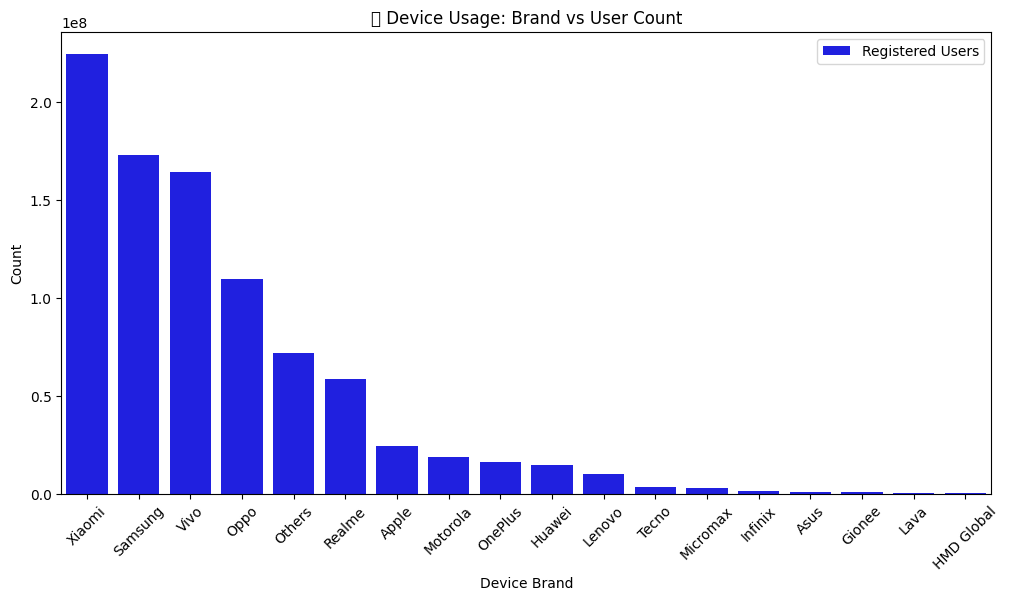

In [103]:
# Sort data by 'User_count' in descending order
device_usage_sorted = device_usage.sort_values(by='User_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=device_usage_sorted, x=corrected_column_name[0], y='User_count', color='blue', label='Registered Users')
#sns.barplot(data=device_usage, x=corrected_column_name[0], y='User_percentage', color='red', alpha=0.6, label='App Opens')

plt.title("📱 Device Usage: Brand vs User Count")
plt.xlabel("Device Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


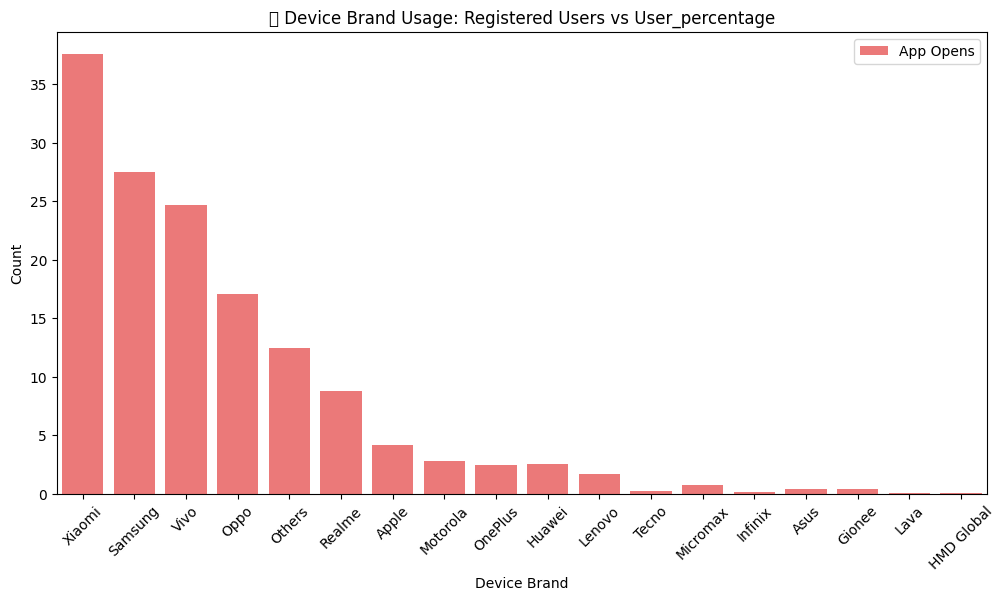

In [104]:
# Sort data by 'User_count' in descending order
device_usage_sorted = device_usage.sort_values(by='User_count', ascending=False)

plt.figure(figsize=(12, 6))
#sns.barplot(data=device_usage, x=corrected_column_name[0], y='User_count', color='blue', label='Registered Users')
sns.barplot(data=device_usage_sorted, x=corrected_column_name[0], y='User_percentage', color='red', alpha=0.6, label='App Opens')

plt.title("📱 Device Brand Usage: Registered Users vs User_percentage")
plt.xlabel("Device Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 3. Insurance Penetration & Market Growth

In [105]:
map_insurance.head(5)

,state,year,quater,name,count,amount
0,puducherry,2020,4,Insurance,234,197955.0
1,puducherry,2024,4,Insurance,2838,3896033.0
2,puducherry,2021,4,Insurance,786,946607.0
3,puducherry,2023,4,Insurance,2447,3419395.0
4,puducherry,2022,4,Insurance,2331,2693130.0


In [106]:
map_insurance.isna().sum()
map_insurance.nunique()

,0
state,36
year,5
quater,1
name,1
count,178
amount,179


<ipython-input-107-655bc52eb862>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insurance_count_sorted, x='state', y='count', palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


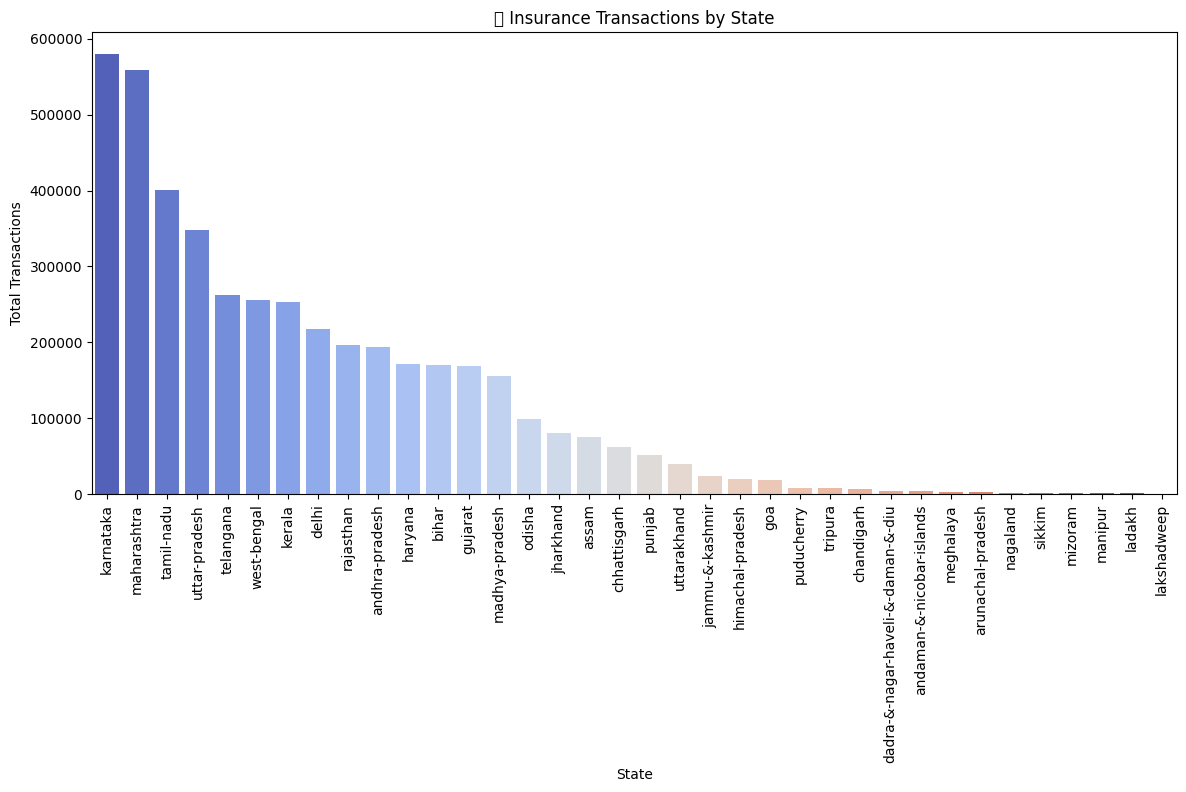

In [107]:
# Group insurance transactions by state
insurance_by_state = map_insurance.groupby('state')['count'].sum().reset_index()

# Sort data by count in states
insurance_count_sorted = insurance_by_state.sort_values(by='count', ascending=False)
# print(insurance_count_sorted)


plt.figure(figsize=(14, 6))
sns.barplot(data=insurance_count_sorted, x='state', y='count', palette="coolwarm")
plt.title("🛡️ Insurance Transactions by State")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=90)
plt.show()


## 4. Geographical Analysis (Top Performing States)

In [108]:
map_transaction.head(5)

,state,year,quater,transaction_count,transaction_amount
0,puducherry,2020,3,1730902,3.598080e+09
1,tamil nadu,2020,3,70277825,1.438414e+11
2,uttar pradesh,2020,3,127405259,2.486900e+11
3,madhya pradesh,2020,3,108579881,2.057017e+11
4,andhra pradesh,2020,3,204902935,4.670841e+11


In [109]:
map_transaction.describe()

,quater,transaction_count,transaction_amount
count,1008.000000,1.008000e+03,1.008000e+03
mean,2.500000,2.334169e+08,3.427801e+11
std,1.118589,5.143721e+08,7.030288e+11
min,1.000000,7.780000e+02,1.928611e+06
25%,1.750000,2.072062e+06,4.434177e+09
50%,2.500000,1.799364e+07,2.951822e+10
75%,3.250000,1.775121e+08,2.812155e+11
max,4.000000,3.634232e+09,4.151820e+12


In [110]:
print(map_transaction.columns)

Index(['state', 'year', 'quater', 'transaction_count', 'transaction_amount'], dtype='object')


<ipython-input-111-71103b0f61ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='state', y='transaction_count', palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


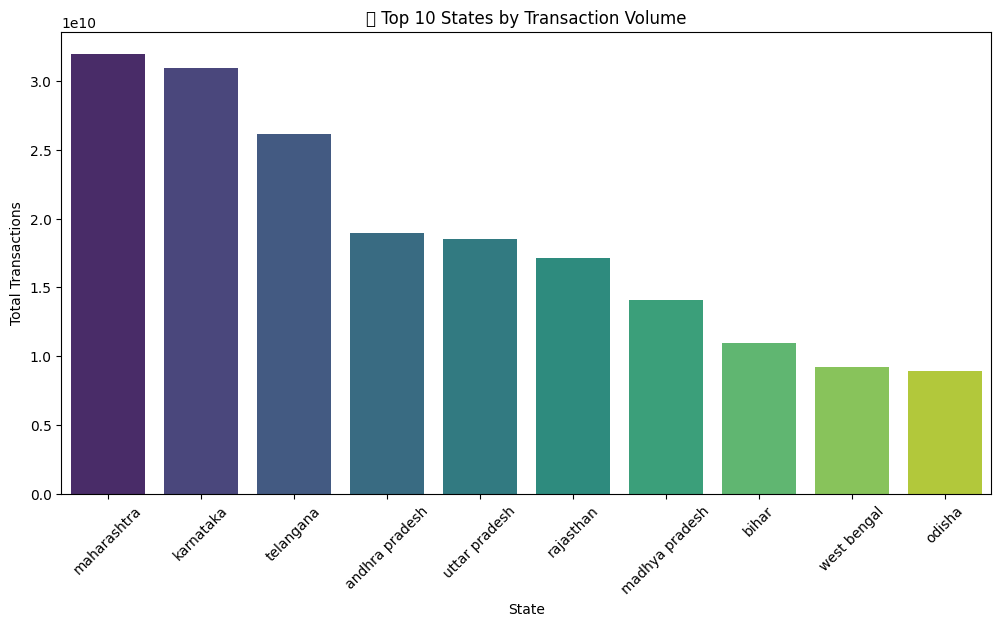

In [111]:
# Get top 10 states by transaction volume
top_states = map_transaction.groupby('state')['transaction_count'].sum().reset_index().nlargest(10, 'transaction_count')

plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x='state', y='transaction_count', palette="viridis")
plt.title("📍 Top 10 States by Transaction Volume")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

<ipython-input-112-688e6e30475a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_amount_states, x='state', y='transaction_amount', palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


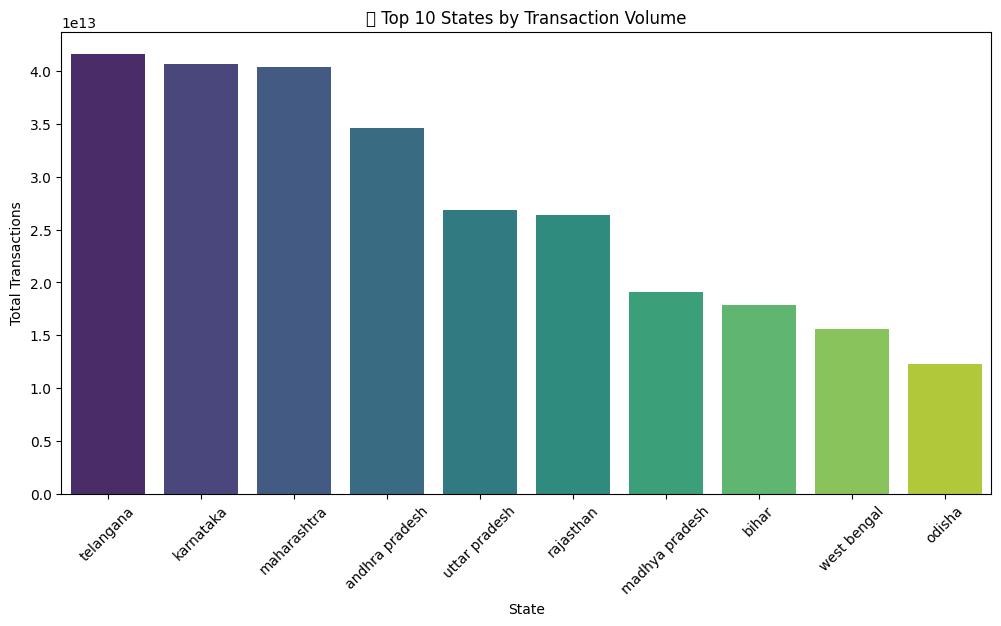

In [112]:
# Get top 10 states by transaction volume
top_amount_states = map_transaction.groupby('state')['transaction_amount'].sum().reset_index().nlargest(10, 'transaction_amount')

plt.figure(figsize=(12,6))
sns.barplot(data=top_amount_states, x='state', y='transaction_amount', palette="viridis")
plt.title("📍 Top 10 States by Transaction Volume")
plt.xlabel("State")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()

## 5. User Registration & Growth Analysis

In [113]:
map_user.head(5)

,state,year,quarter,district,registered_users,app_opens
0,puducherry,2020,3,karaikal district,26910,303955
1,puducherry,2020,3,puducherry district,239707,3437500
2,puducherry,2020,3,yanam district,11054,396823
3,puducherry,2020,3,mahe district,7502,83881
4,puducherry,2020,2,karaikal district,23612,239666


In [114]:
top_user.columns


Index(['state', 'year', 'quater', 'district/pincode', 'top_user_count'], dtype='object')

In [115]:
# Get top 10 districts by user registrations
top_states = top_user.groupby('state')['top_user_count'].sum().reset_index().nlargest(10, 'top_user_count')
print(top_states)

             state  top_user_count
20     maharashtra       843716111
15       karnataka       595858325
1   andhra-pradesh       504044931
33   uttar-pradesh       467294697
31       telangana       447484937
8            delhi       397748721
35     west-bengal       397095841
28       rajasthan       390363391
10         gujarat       377455263
30      tamil-nadu       336904936


<ipython-input-116-ee9c0440f92f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='state', y='top_user_count', palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


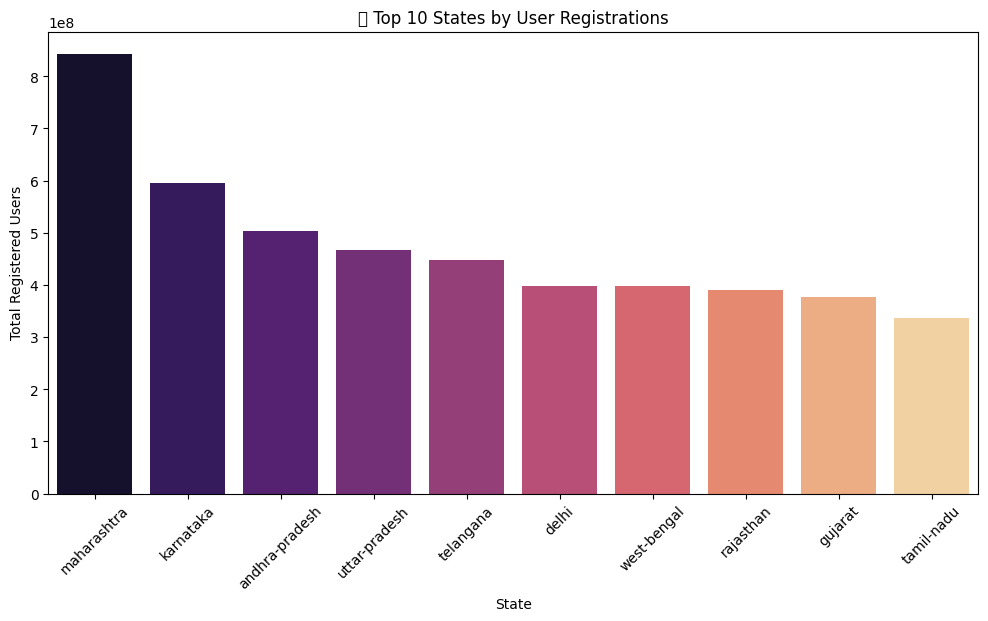

In [116]:

plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x='state', y='top_user_count', palette="magma")
plt.title("👥 Top 10 States by User Registrations")
plt.xlabel("State")
plt.ylabel("Total Registered Users")
plt.xticks(rotation=45)
plt.show()